In [1]:
#modules to load saved models
from joblib import dump, load
from tensorflow.keras.models import load_model

#data preprocessing modules
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

#regression metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from commons import mean_absolute_percentage_error #keep commons.py in notebooks folder

#classification metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score, f1_score

#modules for plots if required
import matplotlib.pyplot as plt
%matplotlib inline
from keras.utils import plot_model
from IPython.display import SVG
from keras.utils import model_to_dot 

Using TensorFlow backend.


# Regression

In [2]:
#file path
data=pd.read_csv('datasets/reg_interval1.csv',sep=',')

# 'datasets/reg_interval1.csv'
# 'datasets/reg_interval2.csv'
# 'datasets/reg_interval3.csv'
# 'datasets/reg_seven.csv'
# 'datasets/reg_thirty.csv'
# 'datasets/reg_ninety.csv'

In [3]:
#visualize the data
data.head(3)

,difficulty,fee_to_rewardUSD,hashrate3std,mediantransactionvalue90smaUSD,mediantransactionvalueUSD,mining_profitability7rsi,price30wmaUSD,price3wmaUSD,price7wmaUSD,price90momUSD,sentinusd30varUSD,transactionfeesUSD,priceUSD
0,4.123083e+08,1.079,1.613338e+14,64.903,231.380,51.766,181.591,220.730,210.518,134.013,6.583452e+15,0.2130,231.403
1,4.397166e+10,0.487,3.917670e+16,99.888,109.132,33.611,293.321,254.923,267.518,-154.347,3.962830e+15,0.0363,239.441
2,4.397166e+10,0.396,5.429477e+16,99.292,88.082,41.201,247.544,222.808,215.902,-123.405,6.909133e+15,0.0333,232.311


In [4]:
#create train-test splits for ANN
length=data.shape[1]-1
X=data.iloc[:,:length]
y=data.iloc[:,length:]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, shuffle=True, random_state=7)
y_train=np.ravel(y_train)
y_test=np.ravel(y_test)
estimators=[]
estimators.append(['robust',RobustScaler()])
estimators.append(['mixmax',MinMaxScaler()])
scaling=Pipeline(estimators)
X_train=scaling.fit_transform(X_train)
X_test=scaling.transform(X_test)
X_train=np.reshape(X_train,(X_train.shape[0],1,X_train.shape[1]))
X_test=np.reshape(X_test,(X_test.shape[0],1,X_test.shape[1]))
y_train=np.reshape(y_train, (y_train.shape[0],1,1))
y_test=np.reshape(y_test,(y_test.shape[0],1,1))

In [5]:
#load saved model
LSTM=load_model('trained_models/LSTM_reg_interval1.hdf5',compile=False)

# 'trained_models/LSTM_reg_interval1.hdf5'
# 'trained_models/LSTM_reg_interval2.hdf5'
# 'trained_models/LSTM_reg_interval3.hdf5'
# 'trained_models/LSTM_reg_seven.hdf5'
# 'trained_models/LSTM_reg_thirty.hdf5'
# 'trained_models/LSTM_reg_ninety.hdf5'

Instructions for updating:
Colocations handled automatically by placer.


In [6]:
#show model configuration
LSTM.get_config()

{'name': 'sequential_1',
 'layers': [{'class_name': 'Bidirectional',
   'config': {'name': 'bidirectional_1',
    'trainable': True,
    'batch_input_shape': (None, 1, 12),
    'dtype': 'float32',
    'layer': {'class_name': 'LSTM',
     'config': {'name': 'lstm_1',
      'trainable': True,
      'dtype': 'float32',
      'return_sequences': True,
      'return_state': False,
      'go_backwards': False,
      'stateful': False,
      'unroll': False,
      'time_major': False,
      'zero_output_for_mask': True,
      'units': 300,
      'activation': 'relu',
      'recurrent_activation': 'sigmoid',
      'use_bias': True,
      'kernel_initializer': {'class_name': 'VarianceScaling',
       'config': {'scale': 1.0,
        'mode': 'fan_avg',
        'distribution': 'uniform',
        'seed': None,
        'dtype': 'float32'}},
      'recurrent_initializer': {'class_name': 'Orthogonal',
       'config': {'gain': 1.0, 'seed': None, 'dtype': 'float32'}},
      'bias_initializer': {'class

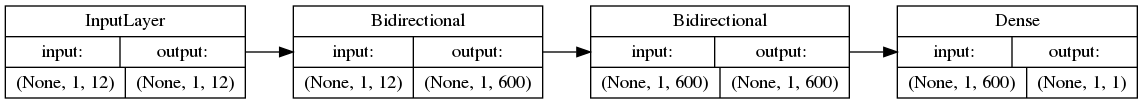

In [7]:
plot_model(LSTM,show_shapes=True,show_layer_names=False,rankdir='LR')

In [8]:
#make predictions
y_pred=LSTM.predict(X_test)

In [9]:
y_test=y_test.ravel() #remove [] from y_test
y_pred=y_pred.ravel() #remove [] from y_pred

In [10]:
#show predictions in tabular format
combine=zip(y_test,y_pred)
pd.DataFrame(combine,columns=['y_test','y_pred'])

,y_test,y_pred
0,238.622,237.669479
1,239.916,235.678116
2,241.816,236.916702
3,230.940,233.600815
4,237.873,239.443283
5,237.015,235.624252
6,240.003,236.275787
7,235.295,235.335770
8,242.991,239.320053
9,230.117,230.458710


In [11]:
#calculate metrics
mae=mean_absolute_error(y_test,y_pred)
mape=mean_absolute_percentage_error(y_test, y_pred)
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
r2=abs(r2_score(y_test, y_pred))

In [12]:
#show metrics in tabular format
metrics=[mae,mape,rmse,r2]
metrics_labels=['MAE','MAPE','RMSE','R^2']
pd.DataFrame(zip( metrics_labels,metrics))

,0,1
0,MAE,2.195671
1,MAPE,0.927766
2,RMSE,3.007450
3,R^2,0.534922


# Classification

In [13]:
#file path
data=pd.read_csv('datasets/cls_interval1.csv',sep=',')

# 'datasets/cls_interval1.csv'
# 'datasets/cls_interval2.csv'
# 'datasets/cls_interval3.csv'
# 'datasets/cls_seven.csv'
# 'datasets/cls_thirty.csv'
# 'datasets/cls_ninety.csv'

In [14]:
#visualize the data
data.head(3)

,activeaddresses30trx,activeaddresses7ema,activeaddresses90std,confirmationtime,confirmationtime3wma,confirmationtime7sma,confirmationtime7wma,confirmationtime90ema,difficulty,fee_to_reward7trxUSD,...,sentbyaddress7var,sentinusd90varUSD,sentinusd90wmaUSD,sentinusdUSD,size30rsi,size90mom,size90sma,transactionfeesUSD,transactions3std,category
0,0.538,74692.0,18183.0,7.273,7.864,8.684,8.282,8.930,6695826.0,1.014,...,30129504.0,1.972499e+15,73371893,136779480.0,48.671,50223.0,154528.0,0.0777,12463.0,1
1,0.569,78988.0,19348.0,7.956,7.822,8.459,8.099,8.909,6695826.0,0.730,...,45880948.0,2.512207e+15,78292153,278422775.0,52.003,61367.0,155210.0,0.1050,15762.0,1
2,0.611,86026.0,21903.0,8.229,7.978,8.064,8.042,8.894,6695826.0,1.028,...,78761044.0,3.061579e+15,83274140,284039909.0,52.771,76185.0,156056.0,0.1330,10252.0,1


In [15]:
#create train-test splits for SVM
length=data.shape[1]-1
X=data.iloc[:,:length]
y=data.iloc[:,length:]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, shuffle=False, random_state=7)
y_train=np.ravel(y_train)
y_test=np.ravel(y_test)
estimators=[]
estimators.append(['robust',RobustScaler()])
estimators.append(['mixmax',MinMaxScaler()])
scaling=Pipeline(estimators)
X_train=scaling.fit_transform(X_train)
X_test=scaling.transform(X_test)
X_train=np.reshape(X_train,(X_train.shape[0],1,X_train.shape[1]))
X_test=np.reshape(X_test,(X_test.shape[0],1,X_test.shape[1]))
unique1, id1 = np.unique(y_train, return_inverse=True)
y_train=to_categorical(id1,num_classes=2)
y_train=np.reshape(y_train, (y_train.shape[0],1,y_train.shape[1]))
unique2, id2 = np.unique(y_test, return_inverse=True)
y_test = to_categorical(id2, num_classes=2)
y_test=np.reshape(y_test,(y_test.shape[0],1,y_test.shape[1]))
y_test=y_test.argmax(-1)

In [16]:
#load saved model
LSTM=load_model('trained_models/LSTM_cls_interval1.hdf5',compile=False)

# 'trained_models/LSTM_cls_interval1.hdf5'
# 'trained_models/LSTM_cls_interval2.hdf5'
# 'trained_models/LSTM_cls_interval3.hdf5'
# 'trained_models/LSTM_cls_seven.hdf5'
# 'trained_models/LSTM_cls_thirty.hdf5'
# 'trained_models/LSTM_cls_ninety.hdf5'

In [17]:
#show model configuration
LSTM.get_config()

{'name': 'sequential_1',
 'layers': [{'class_name': 'Bidirectional',
   'config': {'name': 'bidirectional_1',
    'trainable': True,
    'batch_input_shape': (None, 1, 41),
    'dtype': 'float32',
    'layer': {'class_name': 'LSTM',
     'config': {'name': 'lstm_1',
      'trainable': True,
      'dtype': 'float32',
      'return_sequences': True,
      'return_state': False,
      'go_backwards': False,
      'stateful': False,
      'unroll': False,
      'time_major': False,
      'zero_output_for_mask': True,
      'units': 300,
      'activation': 'relu',
      'recurrent_activation': 'sigmoid',
      'use_bias': True,
      'kernel_initializer': {'class_name': 'VarianceScaling',
       'config': {'scale': 1.0,
        'mode': 'fan_avg',
        'distribution': 'uniform',
        'seed': None,
        'dtype': 'float32'}},
      'recurrent_initializer': {'class_name': 'Orthogonal',
       'config': {'gain': 1.0, 'seed': None, 'dtype': 'float32'}},
      'bias_initializer': {'class

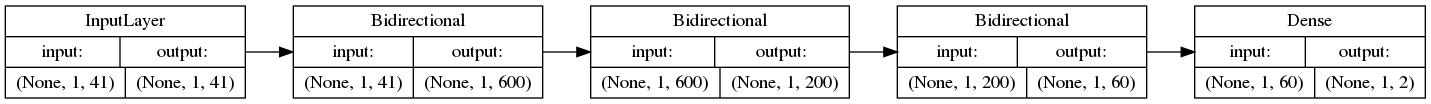

In [18]:
plot_model(LSTM,show_shapes=True,show_layer_names=False,rankdir='LR')

In [19]:
#make predictions
y_pred=LSTM.predict_classes(X_test)

In [20]:
y_pred=y_pred.ravel()
y_test=y_test.ravel()

In [21]:
#show predictions in tabular format
combine=zip(y_test,y_pred)
pd.DataFrame(combine,columns=['y_test','y_pred'])

,y_test,y_pred
0,1,0
1,1,0
2,1,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,1,0
9,1,1


In [26]:
#calculate metrics
accuracy=accuracy_score(y_test,y_pred)
f1=f1_score(y_test,y_pred, average='binary') # try average='weighted' or 'binary' and take higher
auc=roc_auc_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)

In [27]:
#show metrics in tabular format
metrics=[accuracy, f1, auc, recall, precision]
metrics_labels=['Accuracy','F1-score','AUC','Recall','Precision']
pd.DataFrame(zip( metrics_labels,metrics))

,0,1
0,Accuracy,0.540909
1,F1-score,0.632727
2,AUC,0.517473
3,Recall,0.701613
4,Precision,0.576159
